<a href="https://colab.research.google.com/github/Evelyn-Rojas/Ecuaciones-diferenciales-parciales-ll/blob/main/Met_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='orchid'>**EVELYN TANIA ROJAS  ROA**

---



# <font color='mediumpurple'>**Método de Galerkin**

---



> El Método de Galerkin requiere condiciones específicas para aproximar soluciones:

*   Se propone una solución aproximada (combinación lineal de funciones base $B_i$).
*   Se verifica que cumpla las condiciones de frontera.
* Se define un residuo (la ecuación original menos la aproximación).
* Se impone la ortogonalidad (integral del residuo por cada función base/peso, igual a cero en el dominio) para generar un sistema de ecuaciones que al resolverse da los coeficientes de la solución aproximada.


---




* **Ejercicio:**

$$
-\,u'' + u - x = 0,\qquad u(0)=u(1)=0.
$$

Usando:

$$
u_3(x)=\sum_{i=1}^{3}\alpha_i\,\beta_i(x),\qquad \beta_i(x)=\sin(i\pi x).
$$



In [54]:
#Importamos las librerias
import sympy as sp #Calculo simbólico
import numpy as np
import matplotlib.pyplot as plt #Gráficas

In [55]:
x = sp.symbols('x') # introducimos una variable
u = sp.Function('u') # esto es una función

In [56]:
#Ingresamos la ecuación a resolver y la visualizamos
ode = -u(x).diff(x, x) + u(x) - x
ode

-x + u(x) - Derivative(u(x), (x, 2))

In [57]:
sp.dsolve(ode, u(x)) #Resolvemos la ecuación con ayuda de la librería sympy

Eq(u(x), C1*exp(-x) + C2*exp(x) + x)

In [58]:
#Ingresamos las condiciones para la solución exacta y la mostramos
sol = sp.dsolve(ode, ics={u(0): 0, u(1): 0})
sol

Eq(u(x), x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2)))

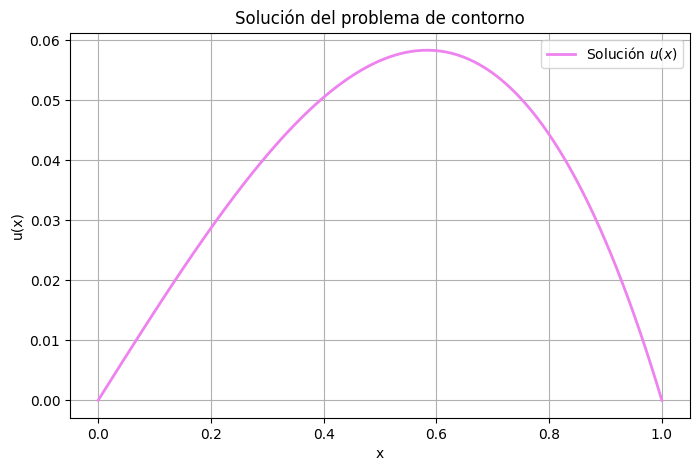

In [59]:
# Convertimos la solución en un arreglo de numpy
u_expr = sol.rhs
u_num = sp.lambdify(x, u_expr, "numpy")
xx = np.linspace(0, 1, 100) #damos valores aleatorios generados entre 0,1
yy = u_num(xx) #evaluamos en la función
#Gráfica
plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="Solución $u(x)$", color='violet', linewidth=2)
plt.title("Solución del problema de contorno")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

* Iniciando con el método:

In [60]:
x = sp.symbols('x') #definimos una variable
N = 3  # número de funciones base

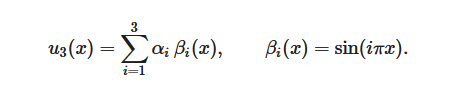

In [61]:
#Contruimos la función base
for i in range(N):
  beta = [sp.sin((i+1)*sp.pi*x)]
alpha = sp.symbols('alpha1:'+str(N+1))

In [62]:
#Contruimos la aproximación y la mostramos
u3 = sum(alpha[i] * phi[i] for i in range(N))
u3

alpha1*sin(pi*x) + alpha2*sin(2*pi*x) + alpha3*sin(3*pi*x)

In [63]:
#Definimos el residuo
residuo = -sp.diff(u3, x, 2) + u3 - x

In [64]:
eqs = [] #Creamos una lista vacía para rellenar al aplicar el método
for j in range(N):
    eq = sp.integrate(residuo * phi[j], (x, 0, 1))
    eqs.append(sp.simplify(eq))

In [65]:
sol1 = sp.solve(eqs, alpha) #resolvemos las ecuaciones para hallar los valores de alpha

In [66]:
#Sustituimos los valores en u_3
u3_sol = sp.simplify(u3.subs(sol1))
u3_sol

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

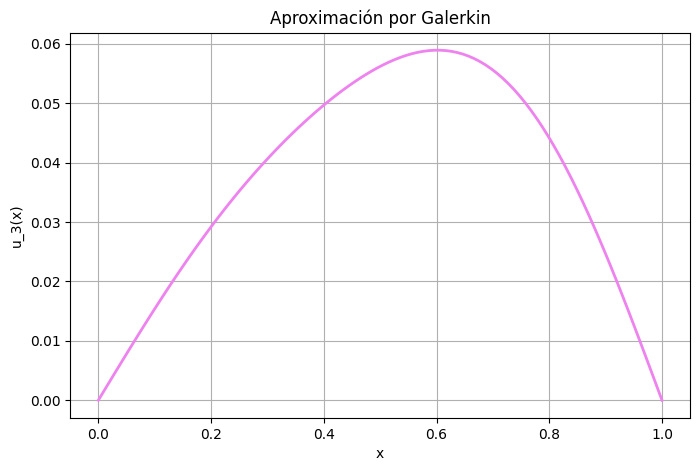

In [67]:
#Graficamos la solución aproximada
u3_num = sp.lambdify(x, u3_sol, 'numpy') #convertimos a un arreglo para permitir gráficar
x_vals = np.linspace(0, 1, 100) #generamos valores aleatorios entre 0,1
y_vals = u3_num(x_vals) #sustiuimos

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals,color='violet', linewidth=2)
plt.xlabel("x")
plt.ylabel("u_3(x)")
plt.title("Aproximación por Galerkin")
plt.grid(True)
plt.show()

* Comparamos la solución exacta con la aproximada utilizando el método:

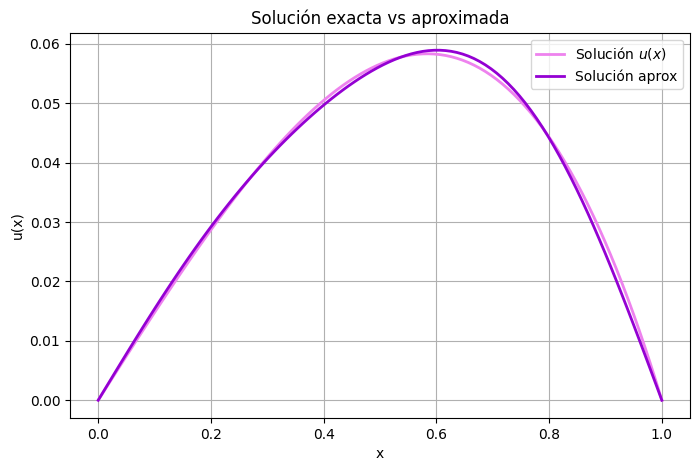

In [71]:
u_expr = sol.rhs
u_num = sp.lambdify(x, u_expr, "numpy")
xx = np.linspace(0, 1, 100) #damos valores aleatorios generados entre 0,1
yy = u_num(xx) #evaluamos en la función
#Gráfica
plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="Solución $u(x)$", color='violet', linewidth=2)
plt.plot(x_vals, y_vals, label='Solución aprox',color='darkviolet', linewidth=2)
plt.title("Solución exacta vs aproximada")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

> Aunque ya visuliazamos en la gráfica anterior que tenemos una aproximación bastante buena, revisaremos el error y lo vizualizaremos a partir de un gráfica obteniendo a su vez cual fue el error más grande.

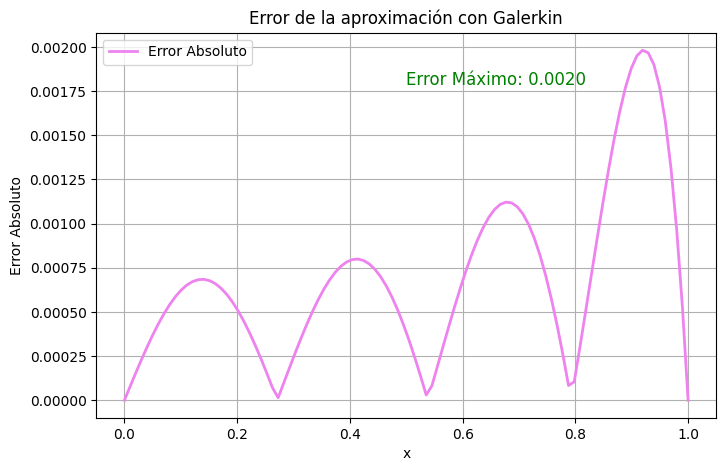

In [75]:
E_abs = np.abs(yy - y_vals) # Usamos los datos del rango completo (xx)
plt.figure(figsize=(8, 5))
plt.plot(xx, E_abs, label=r'Error Absoluto', color='violet', linewidth=2)
plt.title('Error de la aproximación con Galerkin')
plt.xlabel('x')
plt.ylabel('Error Absoluto')
plt.grid(True)
plt.legend()
error_max = np.max(E_abs)
plt.annotate(f'Error Máximo: {error_max:.4f}',
             xy=(0.5, error_max * 0.9),
             xytext=(0.5, error_max * 0.9),
             fontsize=12, color='green')
plt.show()

* Este código puede ser utlizado para cualquier problema, solo basta con cambiar la ecuación a resolver y las funciones base a utlizar.